In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as fig
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

In [2]:
df = pd.read_csv('data/intervals.csv', nrows=15000)

In [3]:
df.tail()

,Unnamed: 0,interval,origindex,timestamp,uniquename
14995,14995,891.0,2235705.0,2018-10-23 16:28:37,1000-11
14996,14996,878.0,2236535.0,2018-10-23 16:43:15,1000-11
14997,14997,883.0,2237285.0,2018-10-23 16:57:58,1000-11
14998,14998,881.0,2238096.0,2018-10-23 17:12:39,1000-11
14999,14999,883.0,2238863.0,2018-10-23 17:27:22,1000-11


In [4]:
df.head()

,Unnamed: 0,interval,origindex,timestamp,uniquename
0,0,NaN,NaN,NaN,NaN
1,1,547.0,1419183.0,2018-10-08 13:00:07,1000-0
2,2,841.0,1419804.0,2018-10-08 13:14:08,1000-0
3,3,901.0,1420489.0,2018-10-08 13:29:09,1000-0
4,4,883.0,1421166.0,2018-10-08 13:43:52,1000-0


In [13]:
df.describe()

,Unnamed: 0,interval,origindex
count,15000.000000,14995.000000,1.499500e+04
mean,7499.500000,1819.623274,2.350797e+06
std,4330.271354,2648.490082,1.391984e+06
min,0.000000,2.000000,4.060000e+02
25%,3749.750000,900.000000,1.181645e+06
50%,7499.500000,1148.000000,2.248184e+06
75%,11249.250000,1455.500000,3.562124e+06
max,14999.000000,50933.000000,4.873886e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b5b3518>,
      dtype=object)

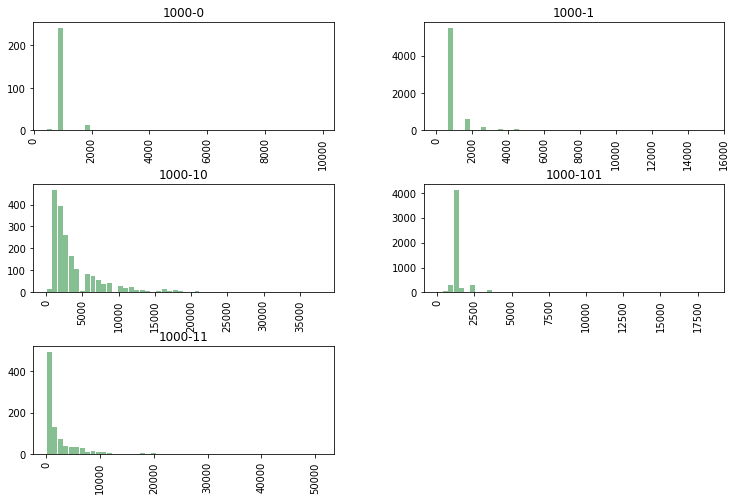

In [5]:
# using matplotlib directly from df.hist()
df.hist(column='interval', by='uniquename', bins=50, grid=False, layout=(3,2), figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


In [18]:
# do some aggregations on the groups using just one of the columns
df.groupby('uniquename')['interval'].describe()

,count,mean,std,min,25%,50%,75%,max
uniquename,,,,,,,,
1000-0,267.0,1016.363296,694.352475,441.0,893.0,901.0,907.0,9909.0
1000-1,6575.0,1190.463878,988.947321,70.0,896.0,902.0,910.0,15285.0
1000-10,1904.0,4113.344013,4594.299328,54.0,1012.0,2694.0,5391.0,37801.0
1000-101,5293.0,1480.439070,1030.144822,2.0,1174.0,1207.0,1258.0,18386.0
1000-11,956.0,3680.764644,6150.089094,3.0,874.0,953.5,3506.5,50933.0


In [6]:
# use group-by and then call seaborn to get the histogram on each group
gps = df.groupby(by='uniquename')['interval']
len(gps)

5

In [22]:
for (name, group) in gps:
    print(name, len(group), group.agg({'mean': np.mean, 'var': np.var, 'std': np.std}))
    group.describe()
    # input()
    # sns.distplot(a=group, label=name, kde=False, rug=True)

1000-0 267 mean      1016.363296
var     482125.360001
std        694.352475
Name: interval, dtype: float64
1000-1 6575 mean      1190.463878
var     978016.803342
std        988.947321
Name: interval, dtype: float64
1000-10 1904 mean    4.113344e+03
var     2.110759e+07
std     4.594299e+03
Name: interval, dtype: float64
1000-101 5293 mean    1.480439e+03
var     1.061198e+06
std     1.030145e+03
Name: interval, dtype: float64
1000-11 956 mean    3.680765e+03
var     3.782360e+07
std     6.150089e+03
Name: interval, dtype: float64


In [23]:
a = gps.get_group("1000-0")

In [25]:
a.describe()

count     267.000000
mean     1016.363296
std       694.352475
min       441.000000
25%       893.000000
50%       901.000000
75%       907.000000
max      9909.000000
Name: interval, dtype: float64

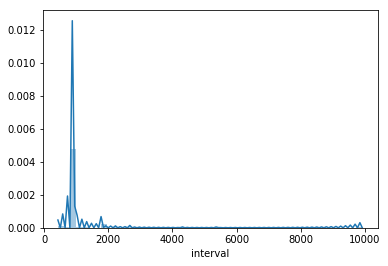

In [24]:
sns.distplot(a)